In [1]:
import pandas as pd
df = pd.read_csv('ExtractedTweets.csv')
df

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
...,...,...,...
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear..."
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...


In [2]:
df["Party"].value_counts()

Republican 44392
Democrat 42068
Name: Party, dtype: int64

In [3]:
df3=df[["Party","Tweet"]]
df3

,Party,Tweet
0,Democrat,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RT @Vegalteno: Hurricane season starts on June...
...,...,...
86455,Republican,Check out my op-ed on need for End Executive O...
86456,Republican,"Yesterday, Betty &amp; I had a great time lear..."
86457,Republican,We are forever grateful for the service and sa...
86458,Republican,Happy first day of school @CobbSchools! #CobbB...


In [4]:
df3.columns = ['Review', 'Sentiment']

In [5]:
# check for null values
df3.isnull().sum()

# no null values in the data

Review 0
Sentiment 0
dtype: int64

In [6]:
x = df3['Tweet']
y = df3['Party']
print(x)
print(y)

KeyError: KeyError: 'Tweet'

In [6]:
!python3 -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 23.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [8]:
import spacy
nlp = spacy.load('en_core_web_md')
import string
punct = string.punctuation

from spacy.lang.de.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)
def text_data_cleaning(sentence):
    doc = nlp(sentence)                         # spaCy tokenize text 

    tokens = [] # list of tokens
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)

    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = df3.Party, random_state = 42)

In [12]:
x_train.shape, x_test.shape

((69168,), (17292,))

In [13]:
###2.Fit x_train and y_train
from sklearn.svm import LinearSVC

classifier = LinearSVC()
#or you can use LogisticRegression classifier
from sklearn.linear_model import LogisticRegression

classifier2 = LogisticRegression()
#or nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

classifier3 = KNeighborsClassifier()
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
#or DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

classifier4 = DecisionTreeClassifier()
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
classifier5=RandomForestClassifier()

pipeline = Pipeline([('tfidf', tfidf), ('clf', classifier5)])
# it will first do vectorization and then it will do classification

In [14]:
pipeline.fit(x_train, y_train)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7fec2aa68280>)),
 ('clf', RandomForestClassifier())]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('tfidf',
 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7fec2aa68280>)),
 ('clf', RandomForestClassifier())]) TfidfVectorizer TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7fec2aa68280>) RandomForestClassifier RandomForestClassifier()

In [15]:
y_pred = pipeline.predict(x_test)
print(y_pred)

['Democrat' 'Democrat' 'Democrat' ... 'Democrat' 'Republican' 'Republican']


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
print(cm)

[[5587 2827]
 [1743 7135]]


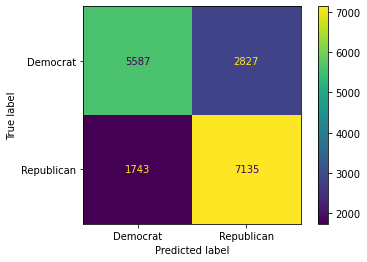

In [17]:
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()
plt.show()

In [21]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Democrat       0.77      0.65      0.70      8414
  Republican       0.71      0.81      0.76      8878

    accuracy                           0.73     17292
   macro avg       0.74      0.73      0.73     17292
weighted avg       0.74      0.73      0.73     17292


In [22]:
prediction = pipeline.predict(["Exciting exchange with young researchers 🔬 Congratulations on the @SJf_CH excellent work and on the courage to follow your own interests 🏅 We need curious and critical minds who want to get to the bottom of the world"])
print(prediction)

['Democrat']


In [ ]:
import pickle
with open("model.pkl","wb") as f:
        pickle.dump(pipeline,f)